In [3]:
from torchvision import models
import torch

In [4]:
import torch.nn.functional as F

In [3]:
alexnet = models.alexnet(pretrained=True)

In [6]:
print(dir(models))

['AlexNet', 'DenseNet', 'GoogLeNet', 'Inception3', 'MNASNet', 'MobileNetV2', 'ResNet', 'ShuffleNetV2', 'SqueezeNet', 'VGG', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'detection', 'googlenet', 'inception', 'inception_v3', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'resnet', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext50_32x4d', 'segmentation', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'shufflenetv2', 'squeezenet', 'squeezenet1_0', 'squeezenet1_1', 'utils', 'vgg', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'video', 'wide_resnet101_2', 'wide_resnet50_2']


In [4]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
#     mean=[0.5, 0.5, 0.5],
#     std=[0.5, 0.5, 0.5]
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [6]:
from PIL import Image
img = Image.open("images/mastiff.jpg")
img2 = Image.open("images/dog.jpg")

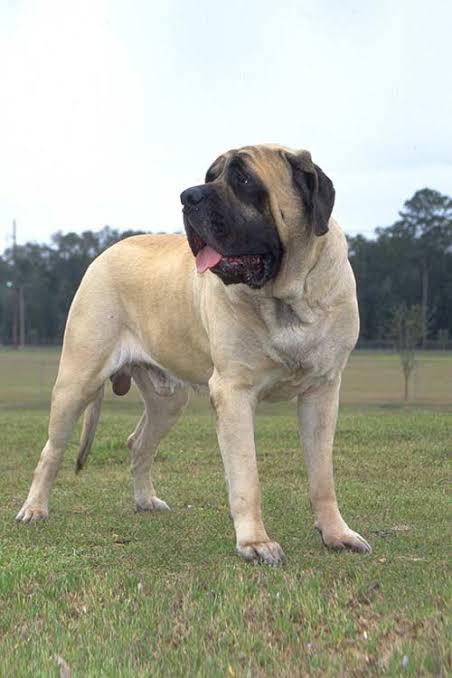

In [7]:
img

In [8]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [9]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [10]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [46]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [49]:
_,label = torch.max(out, 1)
label

tensor([243])

In [13]:
batch_t.shape


torch.Size([1, 3, 224, 224])

In [11]:
with open('imagenet_classes') as f:
    classes = [line.strip() for line in f.readlines()]

In [15]:
a, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(classes[index[0]], percentage[index[0]].item())



243, bull_mastiff 99.16262817382812


In [16]:
a = torch.tensor([[1,2,3,4],[1,2,3,5]])
o1,o2 = torch.max(a,1)
print(o1,o2)

tensor([4, 5]) tensor([3, 3])


In [17]:
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('243, bull_mastiff', 99.16262817382812),
 ('246, Great_Dane', 0.6843653321266174),
 ('254, pug', 0.08243437111377716),
 ('255, Leonberg', 0.021067453548312187),
 ('225, malinois', 0.02085726708173752)]

In [111]:
alexnet = models.resnet101(pretrained=True)
alexnet.eval()
out = alexnet(batch_t)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)
_, index = torch.max(out, 1)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('243, bull_mastiff', 99.63138580322266),
 ('247, Saint_Bernard', 0.08862163126468658),
 ('255, Leonberg', 0.07550455629825592),
 ('246, Great_Dane', 0.04543251171708107),
 ('208, Labrador_retriever', 0.03840305656194687)]

In [18]:
out = resnet(batch_t)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

NameError: name 'resnet' is not defined

In [11]:
import GAE

In [13]:
#alexnet.to(torch.device('cuda'))
original_output, perturbed_output, perturbed_image = GAE.fgsm(alexnet, batch_t, 0.1, torch.device('cpu'))

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = inv_normalize(img)
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

def imshow_compare(img1, img2):
    #innormalize
    img1 = inv_normalize(img1)
    img2 = inv_normalize(img2)
    
    #to_numpy
    npimg1 = img1.detach().cpu().numpy()
    npimg2 = img2.detach().cpu().numpy()
    
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(np.transpose(npimg1, (1, 2, 0)))
    axarr[1].imshow(np.transpose(npimg2, (1, 2, 0)))

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


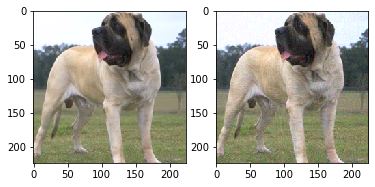

[('243, bull_mastiff', 99.16262817382812), ('246, Great_Dane', 0.6843653321266174), ('254, pug', 0.08243437111377716), ('255, Leonberg', 0.021067453548312187), ('225, malinois', 0.02085726708173752)]


[('348, ram', 10.065106391906738),
 ('9, ostrich', 3.727308750152588),
 ('364, three-toed_sloth', 3.467730760574341),
 ('228, komondor', 3.174753189086914),
 ('345, ox', 2.958002805709839)]

In [15]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [30]:
batch_t.requires_grad_()
out = alexnet(batch_t)

grads = torch.autograd.grad(out[0][11], batch_t)
grads[0].shape

torch.Size([1, 3, 224, 224])

In [26]:
percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('348, ram', 10.065106391906738),
 ('9, ostrich', 3.727308750152588),
 ('364, three-toed_sloth', 3.467730760574341),
 ('228, komondor', 3.174753189086914),
 ('345, ox', 2.958002805709839)]

In [27]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]
#.................

[('243, bull_mastiff', 99.16262817382812),
 ('246, Great_Dane', 0.6843653321266174),
 ('254, pug', 0.08243437111377716),
 ('255, Leonberg', 0.021067453548312187),
 ('225, malinois', 0.02085726708173752)]

In [30]:
def Papernot( model, image, target, device ,atc_target_index):
    """Generates Adv Examples for the Batch"""
    image = image.to(device)
    #target = target.to(device)
    model = model.to(device)
    image.requires_grad = True
    original_output = model(image)

    #loss = F.nll_loss(original_output, target)
    model.zero_grad()
    original_output[0][atc_target_index].backward() #loss.backward()

    data_grad = image.grad.data

    '''perturbed_image = fgsm_attack(image, epsilon, data_grad)

    perturbed_output = model(perturbed_image)

    image.requires_grad = False
    original_output, perturbed_output = original_output.detach(), perturbed_output.detach()
    return original_output, perturbed_output, perturbed_image.detach()'''
    image.requires_grad = False
    return data_grad

In [31]:
jacobian = Papernot(alexnet, batch_t, index, torch.device('cpu'), 2)

In [32]:
jacobian_img = jacobian[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


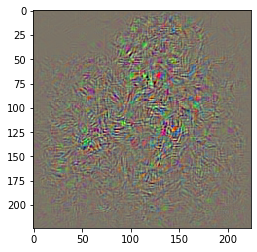

In [36]:
imshow(jacobian_img*10)

In [37]:
def add_jacobian(model ,image, jacobian, epsilon, atc_target_index):
    #image = torch.clamp(image, 0, 1)
    perturbed_image = image + epsilon*jacobian
    #perturbed_image = torch.clamp(perturbed_image, 0, 1)
    #new_batch = torch.unsqueeze(perturbed_image, 0)
    model.eval()
    out = model(perturbed_image)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    _, index = torch.max(out, 1)
    print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])
    print("for the target class we have:", classes[atc_target_index], percentage[atc_target_index].item())
    imshow_compare(image, perturbed_image[0])
    

[('84, peacock', 71.13329315185547), ('806, sock', 1.9079502820968628), ('109, brain_coral', 1.780954360961914), ('824, stole', 1.474787712097168), ('385, Indian_elephant', 1.345704197883606)]
for the target class we have: 2, great_white_shark 0.0004272472287993878


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


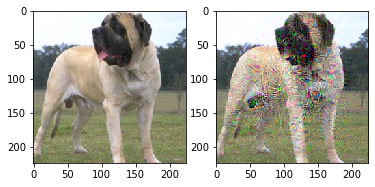

In [38]:
add_jacobian(alexnet, batch_t[0], jacobian, 10, 2)

In [83]:
out = alexnet(jacobian*100)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)
_, index = torch.max(out, 1)
print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])
print("for the target class we have:", classes[2], percentage[2].item())

[('84, peacock', 51.28115463256836), ('815, spider_web', 19.742572784423828), ('971, bubble', 15.71627140045166), ('489, chainlink_fence', 1.7675564289093018), ('637, mailbox', 1.4924200773239136)]
for the target class we have: 2, great_white_shark 1.424709080311004e-05


In [13]:
original_output, perturbed_output, perturbed_image = GAE.deep_fool(alexnet, batch_t, 10, torch.device('cuda'))

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


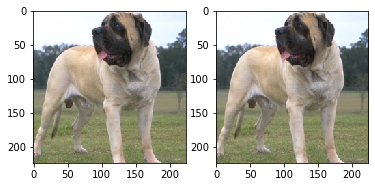

[('243, bull_mastiff', 99.16261291503906), ('246, Great_Dane', 0.6843625903129578), ('254, pug', 0.08243435621261597), ('255, Leonberg', 0.021067289635539055), ('225, malinois', 0.020857185125350952)]


[('255, Leonberg', 48.46834945678711),
 ('243, bull_mastiff', 48.46825408935547),
 ('225, malinois', 1.260711431503296),
 ('246, Great_Dane', 0.6965325474739075),
 ('235, German_shepherd', 0.4174628257751465)]

In [16]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [105]:
anorm.shape


(1, 3, 224)

In [106]:
alist = [i.item() for i in a.flatten()]

In [107]:
alist

[0.8114020824432373, 0.23030626773834229, 0.5312674641609192]

In [21]:
def lbfgs(model, image, target, c=1e-2, bin_search_steps, max_iter, device):
    """Generates Adv Examples for the Batch"""
    image, target = image.to(device), target.to(device)
    model = model.to(device)
    original_output = model(image)
    _, out_label = torch.max(original_output, 0)
    r = torch.empty(image.shape).uniform_()
    r.requires_grad_()
    optimizer = torch.optim.LBFGS([r], max_iter=max_iter)
    while out_label.item() != target.item()
        for i in range(bin_search_steps):
            def closure():
                optimizer.zero_grad()
                output = model(image+r)
                loss = c*F.cross_entropy(output, target) + torch.sum(r**2) #or torch.sum(torch.abs(r))
                loss.backward()
                return loss
                #model.zero_grad() TODO:Should it be here?
            optimizer.step(closure)
    r.requires_grad = False    
    perturbed_output = model(image+r)
    perturbed_image = image+r
    original_output, perturbed_output = original_output.detach(), perturbed_output.detach()
    return original_output, perturbed_output, perturbed_image.detach()

In [44]:
original_output, perturbed_output, perturbed_image = lbfgs(alexnet, batch_t, torch.tensor([255]), 0.001, 3, 5, torch.device('cpu'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


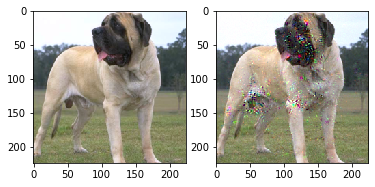

[('243, bull_mastiff', 99.16262817382812), ('246, Great_Dane', 0.6843653321266174), ('254, pug', 0.08243437111377716), ('255, Leonberg', 0.021067453548312187), ('225, malinois', 0.02085726708173752)]


[('255, Leonberg', 99.92434692382812),
 ('182, Border_terrier', 0.025762900710105896),
 ('235, German_shepherd', 0.020787524059414864),
 ('244, Tibetan_mastiff', 0.015121675096452236),
 ('256, Newfoundland', 0.003086002776399255)]

In [45]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [20]:
def lbfgs(model, image, target, c=1e-2, bin_search_steps=5, max_iter=10, const_upper=1, device=torch.device('cpu')):
    """Generates Adv Examples for the Batch"""
    image, target = image.to(device), target.to(device)
    model = model.to(device)
    original_output = model(image)
    _, out_label = torch.max(original_output, 0)
    r = torch.empty(image.shape).uniform_()
    r_old = r.clone().requires_grad_(False)
    r.requires_grad_()
    optimizer = torch.optim.LBFGS([r], max_iter=max_iter)
    
    const_lower = 0
    const_upper = const_upper
    
    for i in range(bin_search_steps):
        def closure():
            optimizer.zero_grad()
            output = model(image+r)
            loss = c*F.cross_entropy(output, target) + torch.sum(r**2) #or torch.sum(torch.abs(r))
            loss.backward()
            return loss
            #model.zero_grad() TODO:Should it be here?
        optimizer.step(closure)
        _, out_label = torch.max(model(image+r), 1) 
        if(torch.sum(r**2).item()<torch.sum(r_old**2).item() and target.item()==out_label.item()):
                r_old = r.clone().detach().requires_grad_(False)
        if(target.item()==out_label.item()):
            const_upper = min(const_upper, c)
            c = (const_upper+const_lower)/2
        else:
            const_lower = max(const_lower, c)
            c = (const_upper+const_lower)/2
    r.requires_grad = False    
    perturbed_output = model(image+r_old)
    perturbed_image = image+r_old
    original_output, perturbed_output = original_output.detach(), perturbed_output.detach()
    return original_output, perturbed_output, perturbed_image.detach()

In [21]:
original_output, perturbed_output, perturbed_image = lbfgs(alexnet, batch_t, torch.tensor([255]), 0.01, 5, 5, 2, torch.device('cpu'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


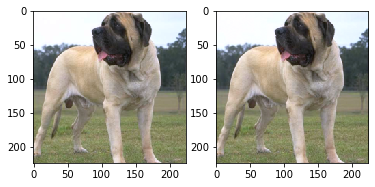

[('243, bull_mastiff', 99.16262817382812), ('246, Great_Dane', 0.6843653321266174), ('254, pug', 0.08243437111377716), ('255, Leonberg', 0.021067453548312187), ('225, malinois', 0.02085726708173752)]


[('255, Leonberg', 55.57546615600586),
 ('243, bull_mastiff', 41.73165512084961),
 ('225, malinois', 1.2283982038497925),
 ('246, Great_Dane', 0.4783886969089508),
 ('235, German_shepherd', 0.3426050841808319)]

In [22]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]
